In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from skimage import io, color, img_as_bool, exposure, transform, feature
%matplotlib inline

In [2]:
# file paths
ci_path = '/Volumes/Samsung_T3/machinelearning/data/plane_data/cropped_images_18/'
l_file = '/Volumes/Samsung_T3/machinelearning/data/plane_data/plane_labels_2018.csv'
sandbox = '/Volumes/Samsung_T3/machinelearning/ml/week08/sandbox/'

In [3]:
# all labels
plane_data = pd.read_csv(l_file)
print(plane_data.head())
print(plane_data.shape)

                   img_name  plane
0  2016-08-02T13+50+24_430Z  False
1  2016-08-02T14+12+37_390Z  False
2  2016-08-02T22+20+26_600Z  False
3  2016-08-03T12+04+30_670Z  False
4  2016-08-03T12+32+21_790Z  False
(6758, 2)


In [4]:
# filter to include only the airplane images
print(plane_data['plane'].sum())
aircraft = plane_data[plane_data['plane']==True]
print(aircraft.shape)

101
(101, 2)


In [5]:
# take a random subset of 20 of the airplane images
aircraft_subset = aircraft.sample(20)
print(aircraft_subset.shape)

(20, 2)


### Edge Detection (Roberts, Sobel, Prewitt, Scharr)

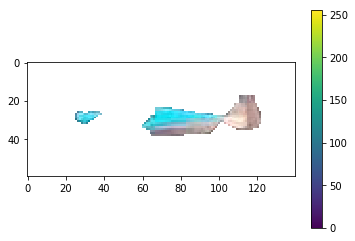

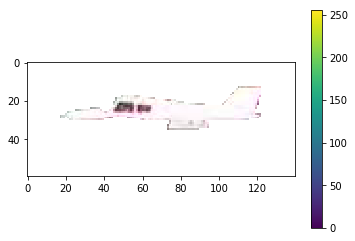

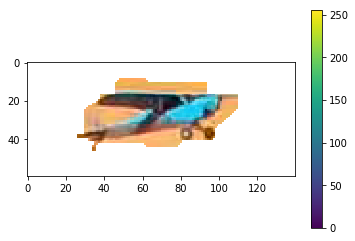

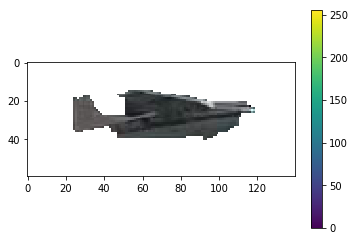

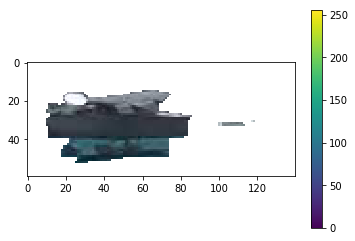

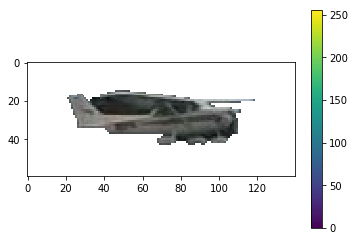

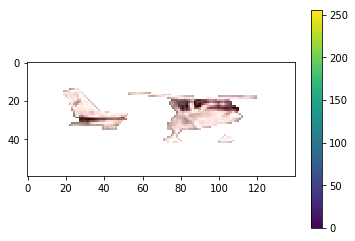

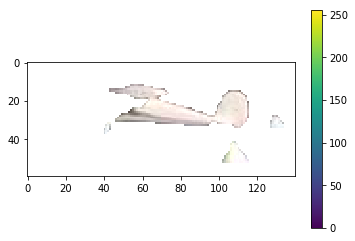

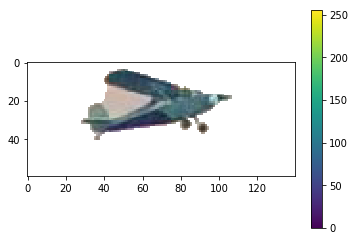

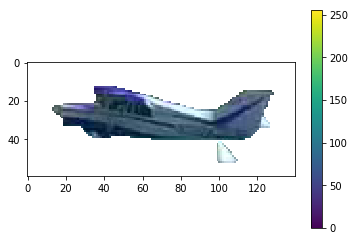

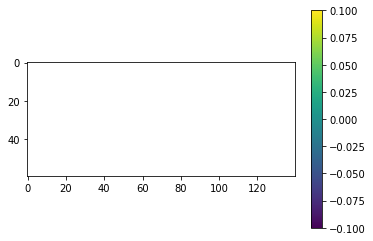

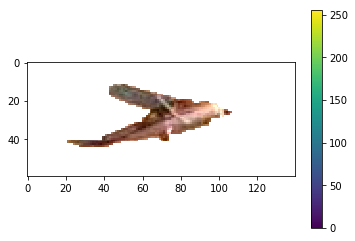

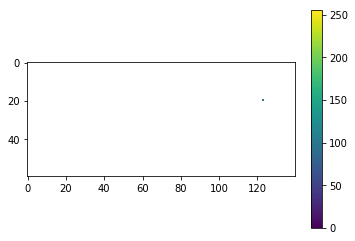

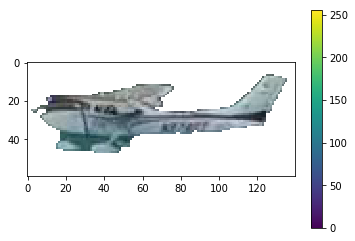

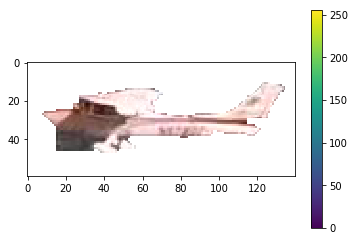

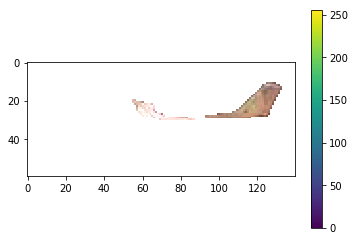

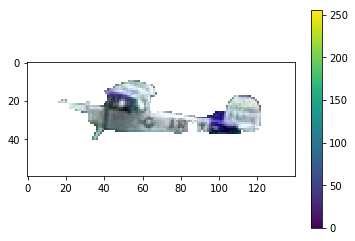

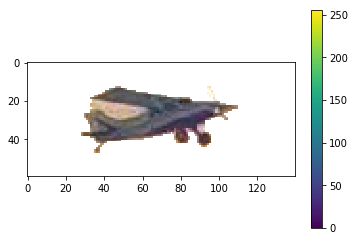

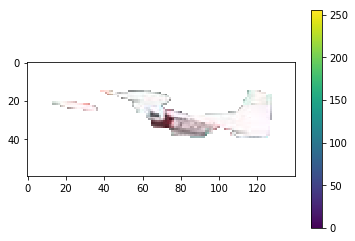

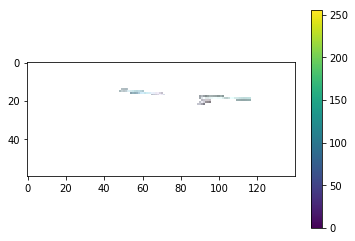

In [117]:
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.morphology import skeletonize
from skimage import data
from skimage.util import invert
from skimage import util 
from skimage import data, exposure, img_as_float
from skimage.feature import canny
from scipy import ndimage as ndi
from PIL import Image
from skimage.transform import rescale, resize, downscale_local_mean
import cv2 as cv

# for each of the subset images, alter them and view the alterations
f = open(sandbox + "view_images.html","w") 
first_image = False

for index, row in aircraft_subset.iterrows():
    imname = ci_path + row['img_name'] + '.png'
#     img_raw = io.imread(imname)
# #     final_image = img_as_bool(img_raw) 
#     final_image = color.rgb2gray(img_raw)
#     image = final_image
    
    image = cv.imread(imname)
    mask = np.zeros(image.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    height, width = image.shape[:2]
    rect = (1,1,width-5,height-5)
    cv.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    image = image*mask2[:,:,np.newaxis]
    
    tmp = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    _,alpha = cv.threshold(tmp,0,255,cv.THRESH_BINARY)
    b, g, r = cv.split(image)
    rgba = [b,g,r, alpha]
    image = cv.merge(rgba,4)
    
    plt.imshow(image),plt.colorbar(),plt.show()

#     edge_roberts = roberts(image)
#     edge_sobel = sobel(image)
#     edge_prewitt = prewitt(image)
#     edge_scharr = scharr(image)
    
#     edge_roberts = util.invert(edge_roberts)
#     edge_sobel = util.invert(edge_sobel)
#     edge_prewitt = util.invert(edge_prewitt)
#     edge_scharr = util.invert(edge_scharr)
    
#     edge_roberts = exposure.equalize_hist(edge_roberts, nbins=2)
#     edge_sobel = exposure.equalize_hist(edge_sobel, nbins=2)
#     edge_prewitt = exposure.equalize_hist(edge_prewitt, nbins=2)
#     edge_scharr = exposure.equalize_hist(edge_scharr, nbins=2)
    
#     edge_roberts = canny(edge_roberts)
#     edge_sobel = canny(edge_sobel)
#     edge_prewitt = canny(edge_prewitt)
#     edge_scharr = canny(edge_scharr)
    
#     edge_roberts = ndi.binary_fill_holes(edge_roberts)
#     edge_sobel = ndi.binary_fill_holes(edge_sobel)
#     edge_prewitt = ndi.binary_fill_holes(edge_prewitt)
#     edge_scharr = ndi.binary_fill_holes(edge_scharr)
    
#     edge_sobel = rescale(edge_sobel, 1.0 / 2.0)
      
#     fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
#                            figsize=(8, 4))
#     ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
#     ax[0].set_title('Roberts Edge Detection')
#     ax[0].imshow(edge_sobel, cmap=plt.cm.gray)
#     ax[0].set_title('Sobel Edge Detection')
#     ax[0].imshow(edge_prewitt, cmap=plt.cm.gray)
#     ax[0].set_title('Prewitt Edge Detection')
#     ax[1].imshow(edge_scharr, cmap=plt.cm.gray)
#     ax[1].set_title('Scharr Edge Detection')
#     for a in ax:
#         a.axis('off')
#     plt.tight_layout()
#     plt.show()
    
#     im = sandbox + row['img_name'] + '.png'
#     plt.imsave(im, edge_sobel)
#     if first_image==False:
#         print(image.shape)
#         print(image)
#         first_image = True
#     f.write("<img src='" + row['img_name'] + ".png' width='320'>\n")

f.close() 


### Skelotonize

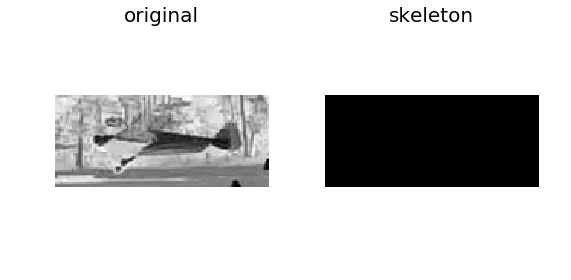

(60, 140)
[[ 0.81232235  0.73389098  0.65153804 ...,  0.85079412  0.90177451
   0.90370196]
 [ 0.81232235  0.81232235  0.76526353 ...,  0.7409902   0.83118627
   0.84487843]
 [ 0.81821608  0.87114588  0.86330275 ...,  0.66701608  0.81995725
   0.85075725]
 ..., 
 [ 0.71655294  0.73616078  0.75576863 ...,  0.49106627  0.49106627
   0.49106627]
 [ 0.51263137  0.52047451  0.52831765 ...,  0.48966745  0.48966745
   0.48966745]
 [ 0.48125882  0.44988627  0.42635686 ...,  0.48574588  0.48574588
   0.48182431]]


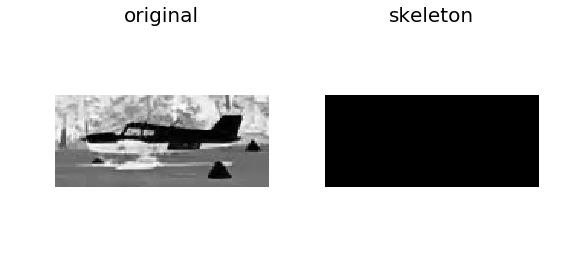

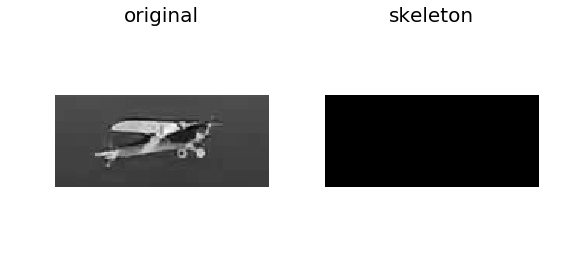

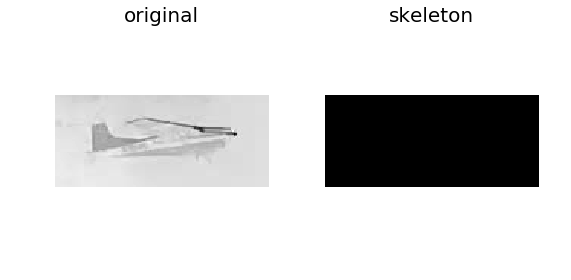

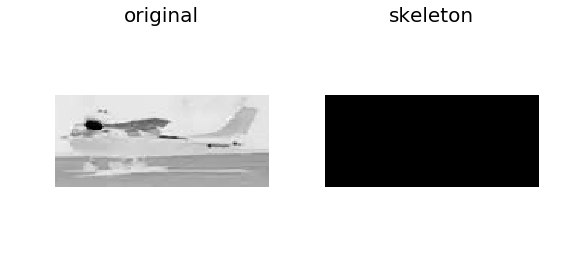

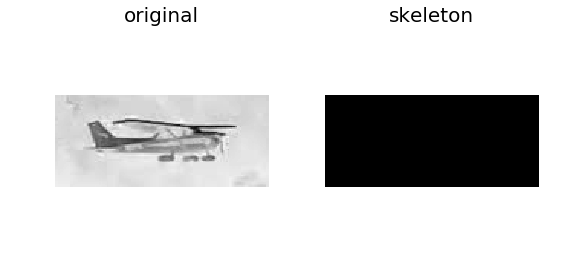

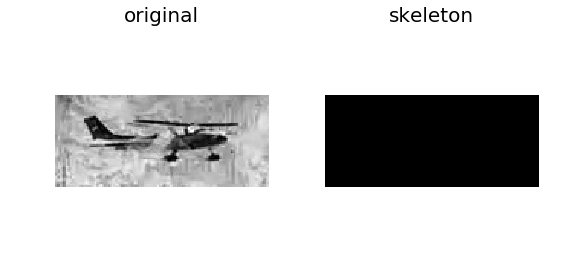

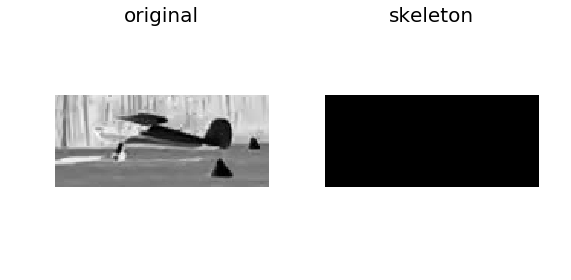

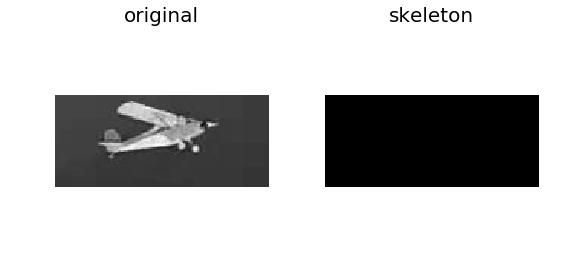

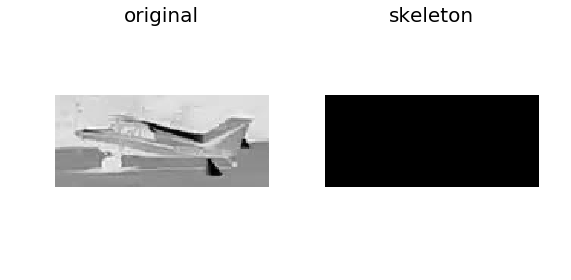

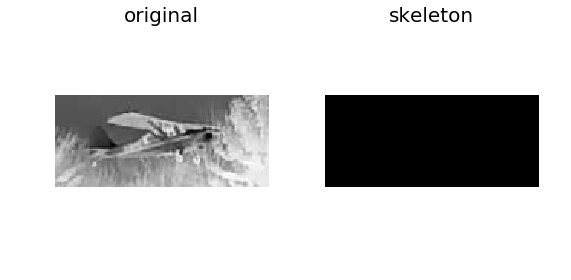

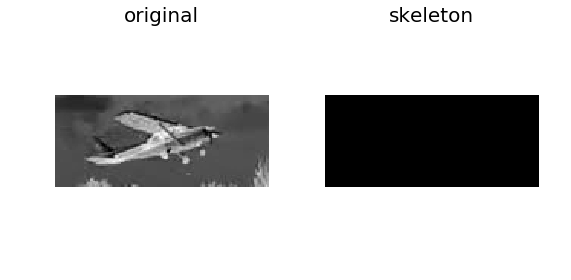

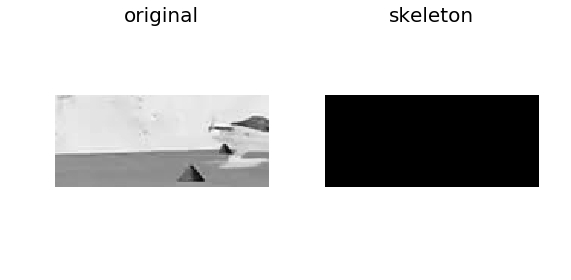

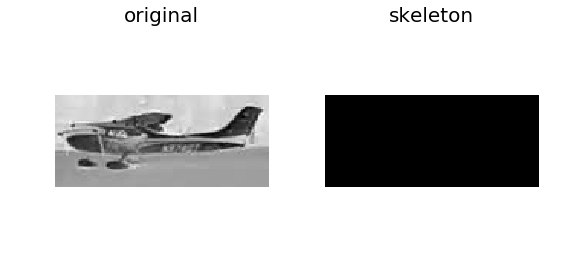

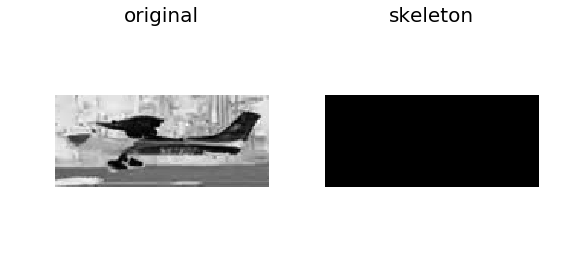

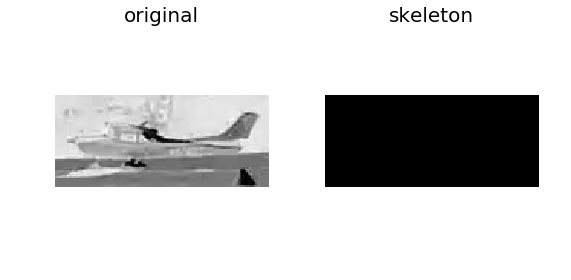

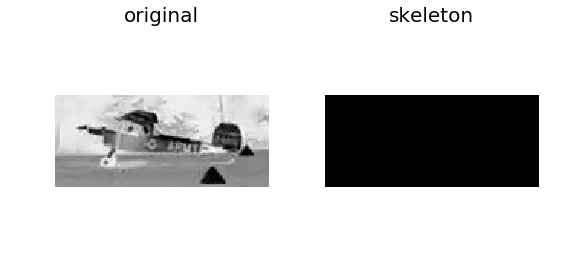

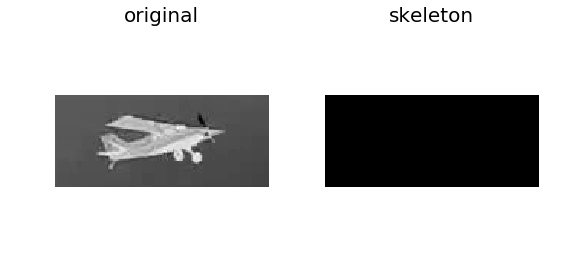

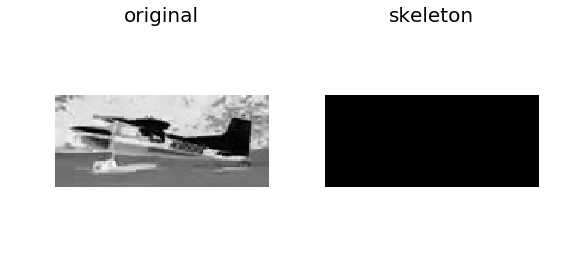

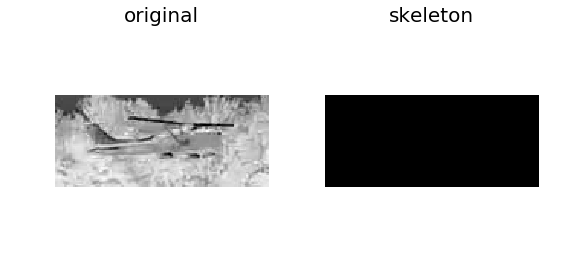

In [20]:
from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.morphology import skeletonize
from skimage import data
from skimage.util import invert

# for each of the subset images, alter them and view the alterations
f = open(sandbox + "view_images.html","w") 
first_image = False

for index, row in aircraft_subset.iterrows():
    imname = ci_path + row['img_name'] + '.png'
    img_raw = io.imread(imname)
#     final_image = img_as_bool(img_raw) 
    final_image = color.rgb2gray(img_raw)
    image = final_image
    
    # Invert the horse image
    image = invert(image)

    # perform skeletonization
    skeleton = skeletonize(image)

    # display results
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                             sharex=True, sharey=True)

    ax = axes.ravel()

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].axis('off')
    ax[0].set_title('original', fontsize=20)

    ax[1].imshow(skeleton, cmap=plt.cm.gray)
    ax[1].axis('off')
    ax[1].set_title('skeleton', fontsize=20)

    fig.tight_layout()
    plt.show()

    im = sandbox + row['img_name'] + '.png'
    plt.imsave(im, image)
    if first_image==False:
        print(image.shape)
        print(image)
        first_image = True
    f.write("<img src='" + row['img_name'] + ".png' width='320'>\n")

f.close() 
